# 评估指标

## 置信度阈值

在机器学习中，P-R曲线（Precision-Recall Curve）用来评估分类模型的性能，尤其是在不平衡数据集的场景中。这里的置信度阈值（Confidence Threshold）是指用于将模型的预测分数（通常是概率值）转化为具体类别标签的分界值。

什么是置信度阈值？
- 定义：置信度阈值是一个分数（如0到1之间的浮点数），用来决定一个预测是否归为正类（positive class）。
    - 如果预测分数 >= 置信度阈值，则预测为正类；
    - 如果预测分数 < 置信度阈值，则预测为负类。
  
- 默认值：在许多二分类任务中，默认的置信度阈值是0.5。

P-R曲线与置信度阈值的关系
- 点的生成：P-R曲线中的每个点都对应于不同的置信度阈值。通过调整置信度阈值，计算对应的Precision（精确率）和Recall（召回率），可以绘制出曲线。
    - Precision (精确率)：预测为正类的样本中，真正为正类的比例。
    - Recall (召回率)：真实正类中，被正确预测为正类的比例。
- 曲线特点：
    - 随着阈值的提高，模型会更倾向于预测较少的样本为正类，因此精确率可能上升，而召回率可能下降。
    - 相反，降低阈值会增加召回率，但可能会降低精确率。

如何选择置信度阈值？
- 选择合适的置信度阈值取决于具体任务的需求：

    - 高精确率任务：如果误报（False Positive）代价高，例如医疗诊断，则需要选择较高的置信度阈值。
    - 高召回率任务：如果漏报（False Negative）代价高，例如安全监测，则需要选择较低的置信度阈值。
    - 平衡任务：通过某种评分函数（如F1分数）找到能在精确率和召回率之间取得最佳平衡的阈值。

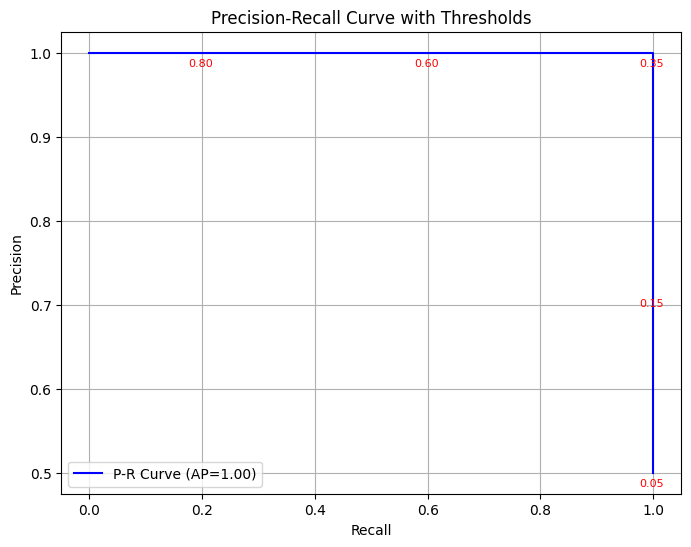

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# 示例数据
y_true = [0, 1, 1, 1, 0, 1, 0, 0, 1, 0]  # 真实标签
y_scores = [0.1, 0.4, 0.35, 0.8, 0.2, 0.6, 0.15, 0.05, 0.7, 0.1]  # 模型预测分数

# 计算 Precision 和 Recall
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# 计算 AP
pr_auc = auc(recall, precision)

# 绘制 P-R 曲线
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'P-R Curve (AP={pr_auc:.2f})', color='blue')

# 标注部分阈值
for i, thresh in enumerate(thresholds):
    if i % 2 == 0:  # 每隔一个点标注
        plt.annotate(f'{thresh:.2f}', (recall[i], precision[i]), 
                     textcoords="offset points", xytext=(-10, -10), fontsize=8, color='red')

# 图形修饰
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Thresholds')
plt.legend()
plt.grid()
plt.show()

## P-R曲线（Precision-Recall Curve）

P-R 曲线，即精确率-召回率曲线，是用于衡量分类模型和目标检测模型性能的重要工具。它通过展示模型在不同置信度阈值下的**精确率（Precision）和召回率（Recall**）变化，反映模型对正样本的检测能力。

P-R 曲线通过在不同的置信度阈值下计算 Precision 和 Recall 的值，然后绘制 
Recall 为横轴，
Precision 为纵轴的曲线。

**步骤**：
- 排序检测框：

    按模型预测的置信度分数，从高到低排序。
- 设置阈值：

    从高分到低分依次设置阈值，逐步增加预测框数量。
- 计算 Precision 和 Recall：

    每个阈值下，累积计算 TP、FP 和 FN，得到 Precision 和 Recall。
- 绘制曲线：

    将所有阈值对应的 Precision 和 Recall 点连成曲线。

**P-R 曲线的形状**  
完美模型：
- P-R 曲线接近左上角，Precision 和 Recall 同时接近 1。
  
性能较差的模型：
- 曲线接近对角线，说明 Precision 和 Recall 在低阈值下都表现不佳。

**P-R 曲线的特点**  
权衡关系：

- Precision 和 Recall 通常是此消彼长的：提高一个会降低另一个。
- 提高阈值：Precision 增加，但 Recall 减少（减少误报但增加漏检）。
- 降低阈值：Recall 增加，但 Precision 减少（减少漏检但增加误报）。
  
不受负样本比例影响：  

- P-R 曲线的计算只依赖于正样本的检测结果，与负样本数量无关。

## AUC (Area Under the Curve)

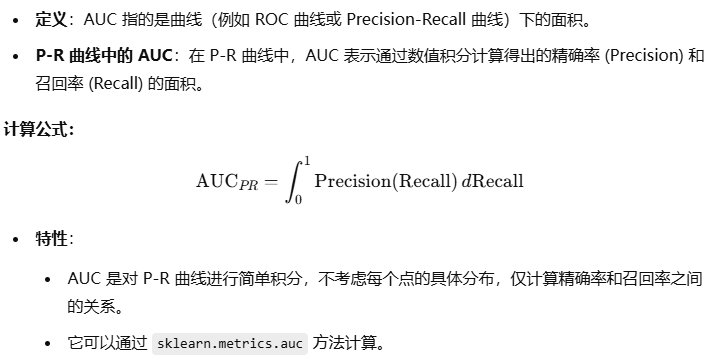

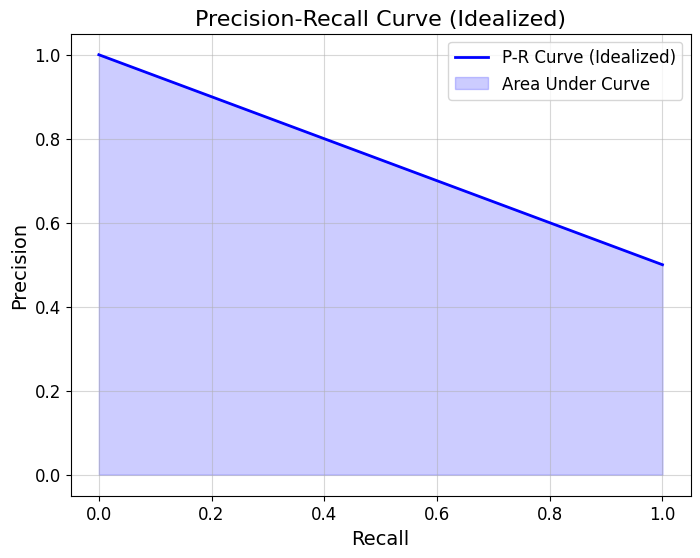

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟标准的 P-R 曲线数据
recall = np.linspace(0, 1, 100)  # Recall 从 0 到 1 均匀分布
precision = 1 - 0.5 * recall  # 生成一个理想化的 Precision 曲线

# 绘制 P-R 曲线
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='P-R Curve (Idealized)', linewidth=2, color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='blue', label='Area Under Curve')

# 设置图形标题和标签
plt.title('Precision-Recall Curve (Idealized)', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.show()

## AP (Average Precision)

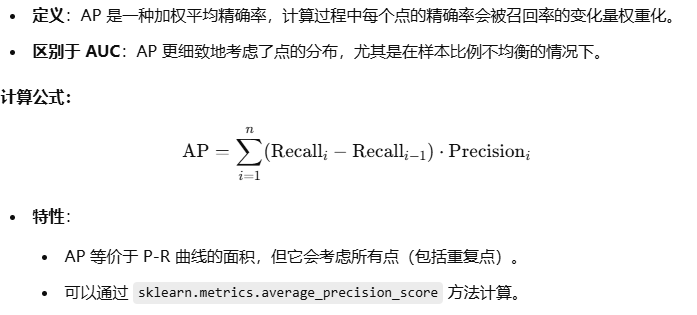